## Visualize data

- Visualize the VBF / GGF data with image representation.

In [5]:
import h5py
from pathlib import Path
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

ROOT = Path.cwd().parent
sys.path.append(ROOT.as_posix())

from src.data import MCSimData

h5_file = (ROOT / Path('data/GGF_zz4l.h5')).as_posix()

#### Key-value pairs in the data

In [6]:
with h5py.File(h5_file, 'r') as f:
    for group_name in f.keys():
        group = f[group_name]
        print(f"Group: {group_name}")
        for dataset_name in group.keys():
            dataset = group[dataset_name]
            print(f"  Dataset: {dataset_name}, shape = {dataset.shape}, dtype = {dataset.dtype}")

Group: EVENT
  Dataset: deta, shape = (196207,), dtype = float32
  Dataset: mjj, shape = (196207,), dtype = float32
  Dataset: type, shape = (196207,), dtype = int64
Group: J1
  Dataset: eta, shape = (196207, 50), dtype = float32
  Dataset: flavor, shape = (196207,), dtype = int64
  Dataset: mask, shape = (196207, 50), dtype = bool
  Dataset: phi, shape = (196207, 50), dtype = float32
  Dataset: pt, shape = (196207, 50), dtype = float32
Group: J2
  Dataset: eta, shape = (196207, 50), dtype = float32
  Dataset: flavor, shape = (196207,), dtype = int64
  Dataset: mask, shape = (196207, 50), dtype = bool
  Dataset: phi, shape = (196207, 50), dtype = float32
  Dataset: pt, shape = (196207, 50), dtype = float32
Group: LEPTON
  Dataset: eta, shape = (196207, 4), dtype = float32
  Dataset: flavor, shape = (196207, 4), dtype = int64
  Dataset: phi, shape = (196207, 4), dtype = float32
  Dataset: pt, shape = (196207, 4), dtype = float32
Group: TOWER
  Dataset: eta, shape = (196207, 250), dtype 

#### Visualize with image

In [7]:
process = 'VBF'
diphoton_data = MCSimData(path=(ROOT / Path(f"data/{process}_diphoton.h5")).as_posix())
zz4l_data = MCSimData(path=(ROOT / Path(f"data/{process}_zz4l.h5")).as_posix())

Minimum and maximum pT in images: 0.0, 1133.1475830078125
Minimum and maximum pT in images: 0.0, 2479.242431640625


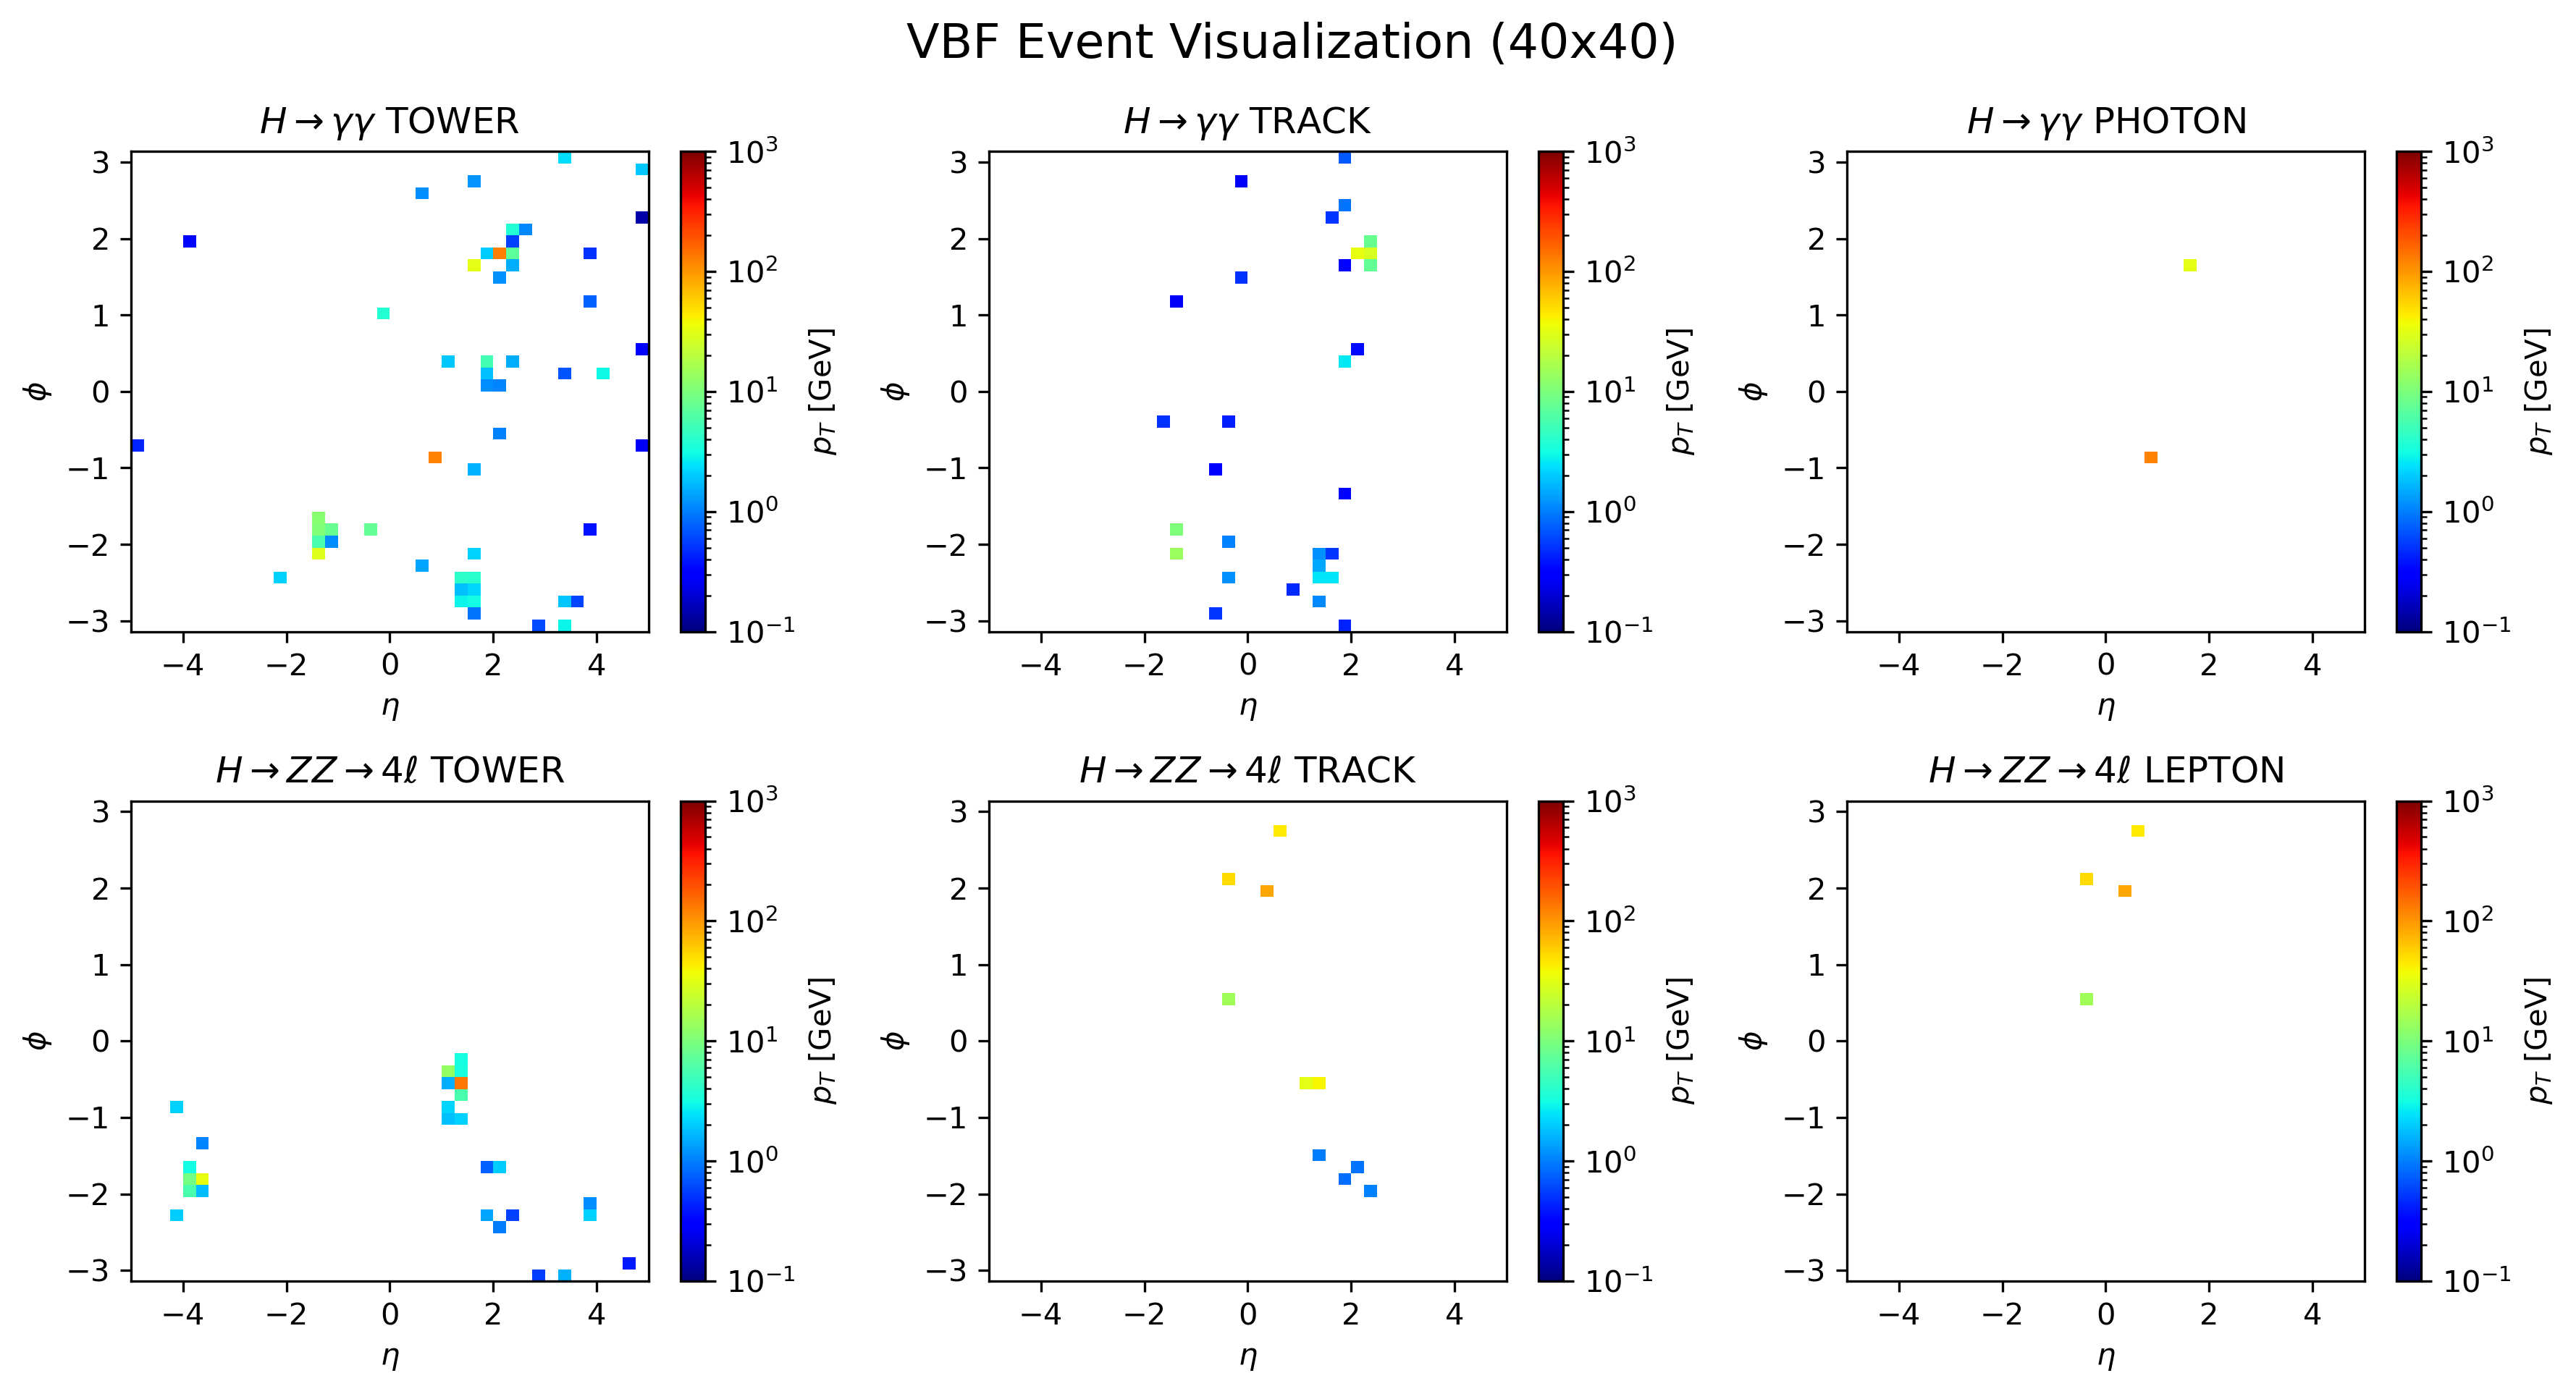

In [8]:
# Plot two rows with including and excluding decay channels
fig, axs = plt.subplots(2, 3, figsize=(12, 6.5), dpi=300)

for i, sim_data in enumerate([diphoton_data, zz4l_data]):

    # Create an instance of MCSimData
    channels = sim_data.channels

    # Get the images using the to_image method
    grid_size = 40
    phi_bins = np.linspace(-np.pi, np.pi, grid_size + 1)
    eta_bins = np.linspace(-5, 5, grid_size + 1)
    images = sim_data.to_image(sim_data.particle_flow, include_decay=True, norm=False)
    print(f"Minimum and maximum pT in images: {images.min()}, {images.max()}")

    for j, channel in enumerate(channels):
        # Select a specific event index to visualize
        EVENT_IDX = 0
        try:
            data = images[EVENT_IDX, j, :, :].numpy()  # Convert to numpy for plotting
        except:
            data = np.zeros((grid_size, grid_size))

        # Mask zeros for proper log scaling
        data_masked = np.ma.masked_where(data == 0, data)
        
        # Plot using pcolormesh. Note: pcolormesh expects bin edges.
        c = axs[i][j].pcolormesh(eta_bins, phi_bins, data_masked.T,
                norm=LogNorm(vmin=0.1, vmax=1e3), cmap='jet')
        axs[i][j].set_xlabel(r'$\eta$')
        axs[i][j].set_ylabel(r'$\phi$')
        if i == 0:
            axs[i][j].set_title(r"$H \to \gamma\gamma$" + f" {channel}")
        elif i == 1:
            axs[i][j].set_title(r"$H \to ZZ \to 4\ell$" + f" {channel}")
        fig.colorbar(c, ax=axs[i][j], label=r'$p_T$ [GeV]')

fig.suptitle(f"{process} Event Visualization (40x40)", fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig(ROOT / 'figures' / f"image_{process}.pdf", bbox_inches='tight')